<a href="https://colab.research.google.com/github/ichaelo/Intelligent-information-system/blob/main/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuz
from skfuzzy import control as ctrl

In [3]:
water_level = ctrl.Antecedent( np.arange(0, 101, 1), "Уровень воды" ) # input
rainfall_intensity = ctrl.Antecedent( np.arange(0, 101, 1), "Количество осадков" )
rain_forecast = ctrl.Antecedent( np.arange(0, 101, 1), "Прогноз осадков" )

gate_discharge_rate = ctrl.Consequent( np.arange(0, 101, 1), "Состояние шлюза" ) # output

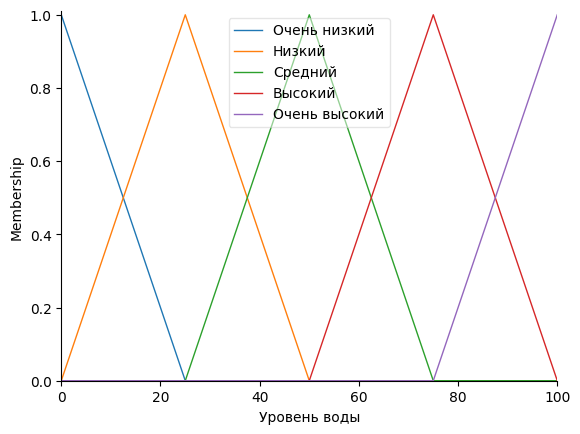

In [4]:
water_level['Очень низкий'] = fuz.trimf(water_level.universe, [0, 0, 25])
water_level['Низкий'] = fuz.trimf(water_level.universe, [0, 25, 50])
water_level['Средний'] = fuz.trimf(water_level.universe, [25, 50, 75])
water_level['Высокий'] = fuz.trimf(water_level.universe, [50, 75, 100])
water_level['Очень высокий'] = fuz.trimf(water_level.universe, [75, 100, 100])

water_level.view()

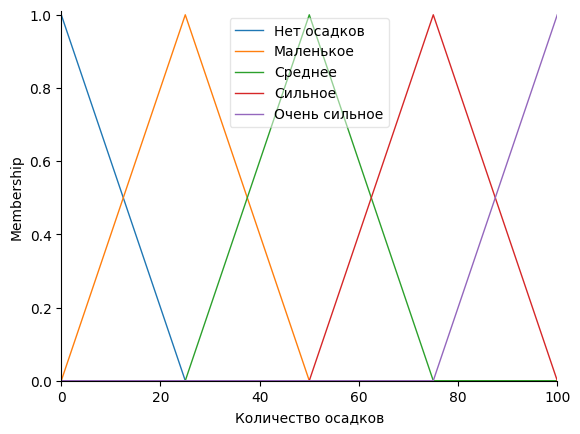

In [5]:
rainfall_intensity['Нет осадков'] = fuz.trimf(rainfall_intensity.universe, [0, 0, 25])
rainfall_intensity['Маленькое'] = fuz.trimf(rainfall_intensity.universe, [0, 25, 50])
rainfall_intensity['Среднее'] = fuz.trimf(rainfall_intensity.universe, [25, 50, 75])
rainfall_intensity['Сильное'] = fuz.trimf(rainfall_intensity.universe, [50, 75, 100])
rainfall_intensity['Очень сильное'] = fuz.trimf(rainfall_intensity.universe, [75, 100, 100])

rainfall_intensity.view()

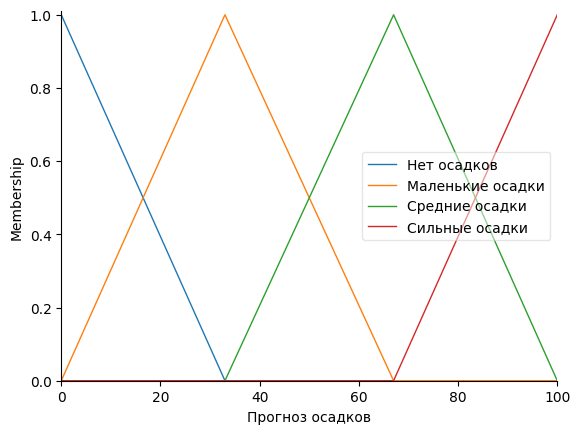

In [6]:
rain_forecast['Нет осадков'] = fuz.trimf(rainfall_intensity.universe, [0, 0, 33])
rain_forecast['Маленькие осадки'] = fuz.trimf(rainfall_intensity.universe, [0, 33, 67])
rain_forecast['Средние осадки'] = fuz.trimf(rainfall_intensity.universe, [33, 67, 100])
rain_forecast['Сильные осадки'] = fuz.trimf(rainfall_intensity.universe, [67, 100, 100])

rain_forecast.view()

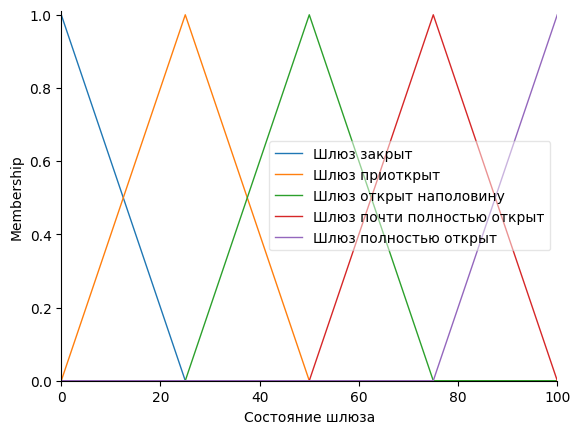

In [7]:
gate_discharge_rate['Шлюз закрыт'] = fuz.trimf(gate_discharge_rate.universe, [0, 0, 25])
gate_discharge_rate['Шлюз приоткрыт'] = fuz.trimf(gate_discharge_rate.universe, [0, 25, 50])
gate_discharge_rate['Шлюз открыт наполовину'] = fuz.trimf(gate_discharge_rate.universe, [25, 50, 75])
gate_discharge_rate['Шлюз почти полностью открыт'] = fuz.trimf(gate_discharge_rate.universe, [50, 75, 100])
gate_discharge_rate['Шлюз полностью открыт'] = fuz.trimf(gate_discharge_rate.universe, [75, 100, 100])

gate_discharge_rate.view()

In [8]:
rule1 = ctrl.Rule(water_level['Очень низкий'] & rainfall_intensity['Нет осадков'] & rain_forecast['Нет осадков'] , gate_discharge_rate['Шлюз закрыт'])
rule2 = ctrl.Rule(water_level['Очень низкий'] & rainfall_intensity['Маленькое'] & rain_forecast['Маленькие осадки'], gate_discharge_rate['Шлюз приоткрыт'])
rule3 = ctrl.Rule(water_level['Низкий'] & rainfall_intensity['Маленькое'] & rain_forecast['Маленькие осадки'], gate_discharge_rate['Шлюз приоткрыт'])
rule4 = ctrl.Rule(water_level['Низкий'] & rainfall_intensity['Среднее'] & rain_forecast['Средние осадки'], gate_discharge_rate['Шлюз открыт наполовину'])
rule5 = ctrl.Rule(water_level['Средний'] & rainfall_intensity['Маленькое'] & rain_forecast['Сильные осадки'], gate_discharge_rate['Шлюз почти полностью открыт'])
rule6 = ctrl.Rule(water_level['Средний'] & rainfall_intensity['Очень сильное'] & rain_forecast['Сильные осадки'], gate_discharge_rate['Шлюз почти полностью открыт'])
rule7 = ctrl.Rule(water_level['Высокий'] & rainfall_intensity['Сильное'] & rain_forecast['Сильные осадки'], gate_discharge_rate['Шлюз полностью открыт'])
rule8 = ctrl.Rule(water_level['Высокий'] & rainfall_intensity['Маленькое'] & rain_forecast['Маленькие осадки'], gate_discharge_rate['Шлюз приоткрыт'])
rule9 = ctrl.Rule(water_level['Очень высокий'] & rainfall_intensity['Среднее'] & rain_forecast['Нет осадков'], gate_discharge_rate['Шлюз открыт наполовину'])
rule10 = ctrl.Rule(water_level['Очень высокий'] & rainfall_intensity['Нет осадков'] & rain_forecast['Нет осадков'], gate_discharge_rate['Шлюз приоткрыт'])
rule11 = ctrl.Rule(water_level['Очень низкий'] & rainfall_intensity['Среднее'] & rain_forecast['Сильные осадки'], gate_discharge_rate['Шлюз открыт наполовину'])
rule12 = ctrl.Rule(water_level['Низкий'] & rainfall_intensity['Нет осадков'] & rain_forecast['Сильные осадки'], gate_discharge_rate['Шлюз открыт наполовину'])
rule13 = ctrl.Rule(water_level['Средний'] & rainfall_intensity['Очень сильное'] & rain_forecast['Маленькие осадки'], gate_discharge_rate['Шлюз почти полностью открыт'])
rule14 = ctrl.Rule(water_level['Высокий'] & rainfall_intensity['Очень сильное'] & rain_forecast['Нет осадков'], gate_discharge_rate['Шлюз почти полностью открыт'])
rule15 = ctrl.Rule(water_level['Очень высокий'] & rainfall_intensity['Маленькое'] & rain_forecast['Сильные осадки'], gate_discharge_rate['Шлюз полностью открыт'])

# rainfall_intensity = rain_forecast = water_level

In [9]:
ctrl_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
simulation = ctrl.ControlSystemSimulation(ctrl_system)

In [18]:
simulation.input["Уровень воды"] = 3
simulation.input["Количество осадков"] = 3
simulation.input["Прогноз осадков"] = 1

In [19]:
simulation.compute()

In [20]:
print(f"Состояние открытости шлюза { simulation.output['Состояние шлюза']:.2f} %")

Состояние открытости шлюза 10.11 %
